<a href="https://colab.research.google.com/github/suyash-dabral/CarbonMarketsHQ_Assignments/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Necessary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#Loading the Excel files and standardizing column names of both files

In [3]:
df1 = pd.read_excel('/content/drive/MyDrive/CarbonMarkets_files/1.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/CarbonMarkets_files/2.xlsx')


In [4]:

df1.columns = [col.strip().lower().replace(' ', '_').replace('/', '_').replace('(', '').replace(')', '') for col in df1.columns]
df2.columns = [col.strip().lower().replace(' ', '_').replace('/', '_').replace('(', '').replace(')', '') for col in df2.columns]

categorical_columns1 = [
    'project_id', 'arb_id', 'cooperative_aggregate_id', 'project_developer', 'project_owner', 'project_name',
    'offset_project_operator', 'authorized_project_designee', 'verification_body', 'project_type', 'status',
    'arb_project_status', 'corsia_eligible', 'project_site_location', 'project_site_state', 'project_site_country',
    'additional_certifications', 'sdg_impact', 'project_notes', 'project_listed_date', 'project_registered_date',
    'documents', 'data', 'project_website'
]

for col in categorical_columns1:
    if col in df1.columns:
        df1[col].fillna('Unknown', inplace=True)


categorical_columns2 = [
    'project_id', 'compliance_program_id_arb_or_ecology', 'project_developer', 'project_name', 'project_type',
    'project_methodology_protocol', 'initial_crediting_period_start_date', 'project_listed_date',
    'current_crediting_period_end_date', 'voluntary_status', 'compliance_program_status_arb_or_ecology',
    'project_status_date', 'project_site_location', 'project_site_state', 'project_site_country',
    'sustainable_development_goals', 'current_vvb', 'acr_project_validation', 'documents', 'project_website'
]

for col in categorical_columns2:
    if col in df2.columns:
        df2[col].fillna('Unknown', inplace=True)


<ipython-input-4-e50d65896de4>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df1[col].fillna('Unknown', inplace=True)


In [5]:
def standardize_column_names(df, column_mapping):
    df.rename(columns=column_mapping, inplace=True)
    df.columns = [col.strip().lower().replace(' ', '_').replace('/', '_').replace('(', '').replace(')', '') for col in df.columns]
    return df

# Defining the column mappings for each DataFrame
column_mapping_df1 = {
    'Project ID': 'project_id',
    'Compliance Program ID (ARB or Ecology)': 'compliance_program_id',
    'Project Developer': 'project_developer',
    'Project Name': 'project_name',
    'Project Type': 'project_type',
    'Project Methodology/Protocol': 'project_methodology',
    'Initial Crediting Period Start Date': 'initial_crediting_period_start_date',
    'Current Crediting Period Start Date': 'project_listed_date',
    'Current Crediting Period End Date': 'current_crediting_period_end_date',
    'Voluntary Status': 'voluntary_status',
    'Compliance Program Status (ARB or Ecology)': 'compliance_program_status',
    'Project Status Date': 'project_status_date',
    'Project Site Location': 'project_site_location',
    'Project Site State': 'project_site_state',
    'Project Site Country': 'project_site_country',
    'Sustainable Development Goal(s)': 'sustainable_development_goals',
    'Current VVB': 'current_vvb',
    'ACR Project Validation': 'acr_project_validation',
    'Total Number of Credits Registered': 'total_number_of_credits_registered',
    'Documents': 'documents',
    'Project Website': 'project_website'
}

column_mapping_df2 = {
    'Proj ID': 'project_id',
    'Comp Program ID': 'compliance_program_id',
    'Proj Developer': 'project_developer',
    'Proj Name': 'project_name',
    'Proj Type': 'project_type',
    'Proj Method/Protocol': 'project_methodology',
    'Init Crediting Start Date': 'initial_crediting_period_start_date',
    'Curr Crediting Start Date': 'project_listed_date',
    'Curr Crediting End Date': 'current_crediting_period_end_date',
    'Vol Status': 'voluntary_status',
    'Comp Program Status': 'compliance_program_status',
    'Proj Status Date': 'project_status_date',
    'Proj Site Location': 'project_site_location',
    'Proj Site State': 'project_site_state',
    'Proj Site Country': 'project_site_country',
    'Sustainable Dev Goal(s)': 'sustainable_development_goals',
    'Curr VVB': 'current_vvb',
    'ACR Proj Validation': 'acr_project_validation',
    'Total Credits Registered': 'total_number_of_credits_registered',
    'Docs': 'documents',
    'Proj Website': 'project_website'
}

df1 = standardize_column_names(df1, column_mapping_df1)
df2 = standardize_column_names(df2, column_mapping_df2)

#Creating new excel files having the columns required

In [6]:
key_columns = [
    'project_id',  'project_name', 'project_type','project_site_location', 'project_site_state', 'project_site_country','project_listed_date',
    'total_number_of_credits_registered'
]

df1_key_columns = [col for col in key_columns if col in df1.columns]
df2_key_columns = [col for col in key_columns if col in df2.columns]

df1 = df1[df1_key_columns]
df2 = df2[df2_key_columns]

In [7]:

unified_df = pd.concat([df1, df2], ignore_index=True)


In [8]:

unified_df.to_excel('/content/drive/MyDrive/CarbonMarkets_files/raw.xlsx', index=False)

#Cleaning data and handling inconsistencies

In [17]:

df = pd.read_excel('/content/drive/MyDrive/CarbonMarkets_files/raw.xlsx')


date_column = 'project_listed_date'

existing_dates = df[date_column].dropna().unique()
df[date_column] = df[date_column].apply(lambda x: np.random.choice(existing_dates) if pd.isnull(x) else x)


def convert_date(date):
    formats = ['%Y-%m-%d %H:%M:%S', '%Y-%m-%d', '%d.%m.%Y', '%m/%d/%Y']
    for fmt in formats:
        try:
            return pd.to_datetime(date, format=fmt)
        except ValueError:
            continue
    return pd.NaT


df['project_listed_date'] = df['project_listed_date'].apply(convert_date)

df.to_excel('/content/drive/MyDrive/CarbonMarkets_files/raw.xlsx', index=False)


In [19]:
df = pd.read_excel('/content/drive/MyDrive/CarbonMarkets_files/raw.xlsx')

group_by_column = 'project_type'

df = df.sort_values(by=[group_by_column])

df.to_excel('/content/drive/MyDrive/CarbonMarkets_files/raw.xlsx', index=False)


In [20]:
df = pd.read_excel('/content/drive/MyDrive/CarbonMarkets_files/raw.xlsx')

group_by_column = 'project_type'
fill_column = 'total_number_of_credits_registered'

mean_credits_group = df.groupby(group_by_column)[fill_column].transform('mean')

df[fill_column] = df[fill_column].fillna(mean_credits_group)

overall_mean = df[fill_column].mean()

df[fill_column] = df[fill_column].fillna(overall_mean)

df = df.sort_values(by=[group_by_column])

df.to_excel('/content/drive/MyDrive/CarbonMarkets_files/raw.xlsx', index=False)


#Analyzing data and creating some visual representation of analysis

<ipython-input-22-365834bb8e2e>:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='total_number_of_credits_registered', y='project_site_country', hue='project_type', data=credits_by_project_type_country, ci=None)


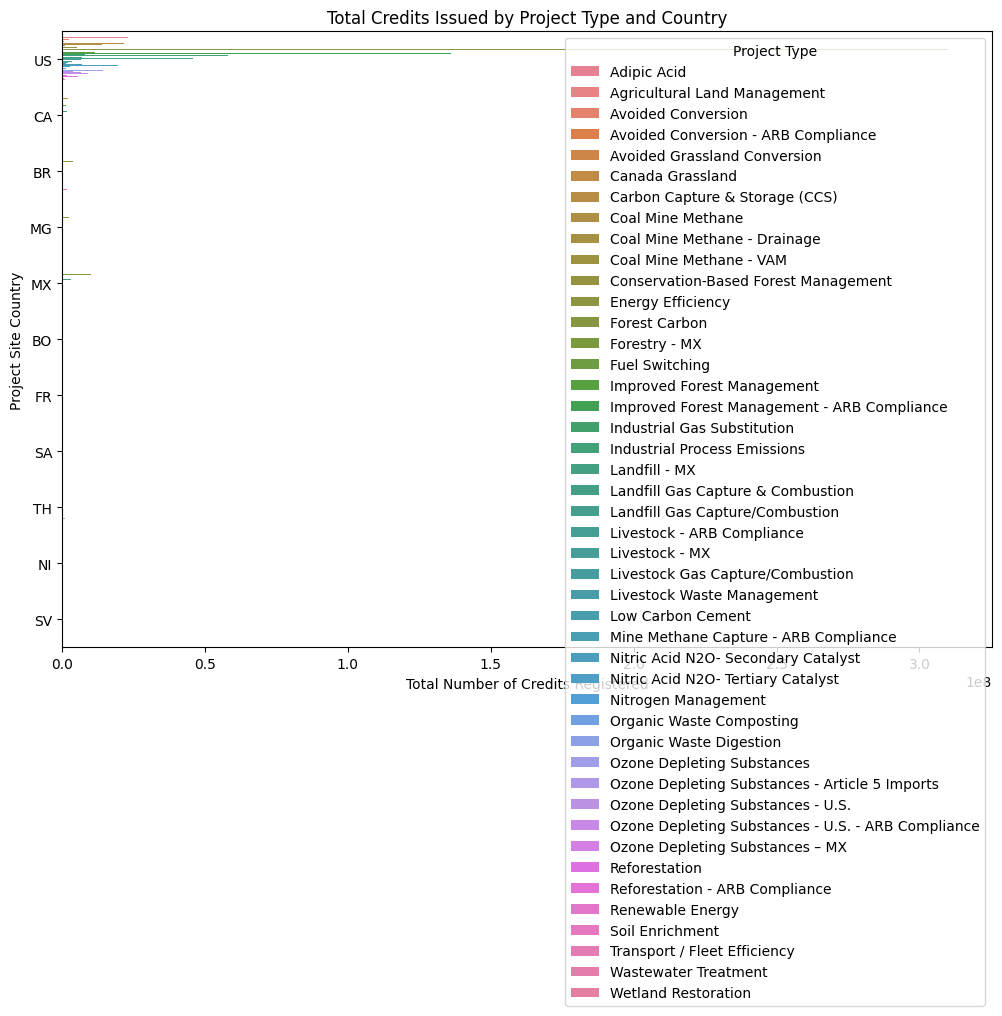

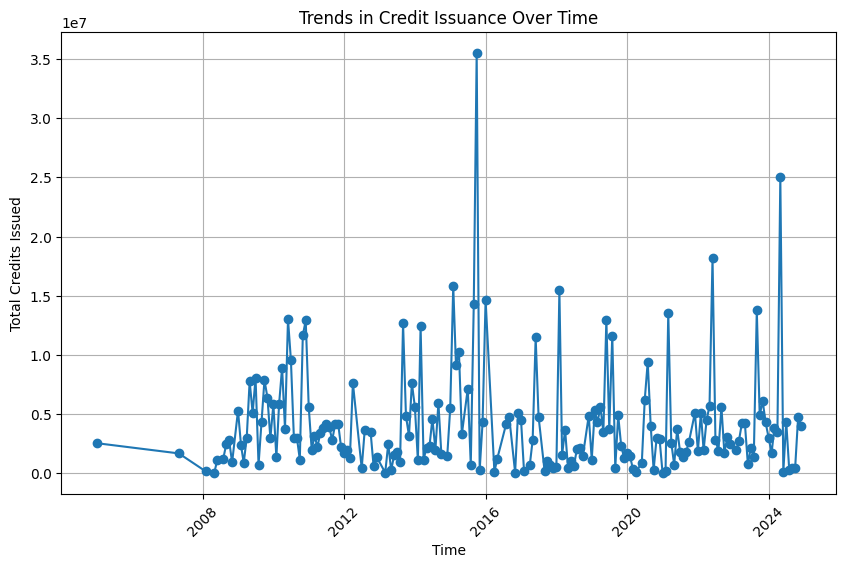

<ipython-input-22-365834bb8e2e>:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='project_type', y='total_number_of_credits_registered', data=average_credits_by_project_type, ci=None)


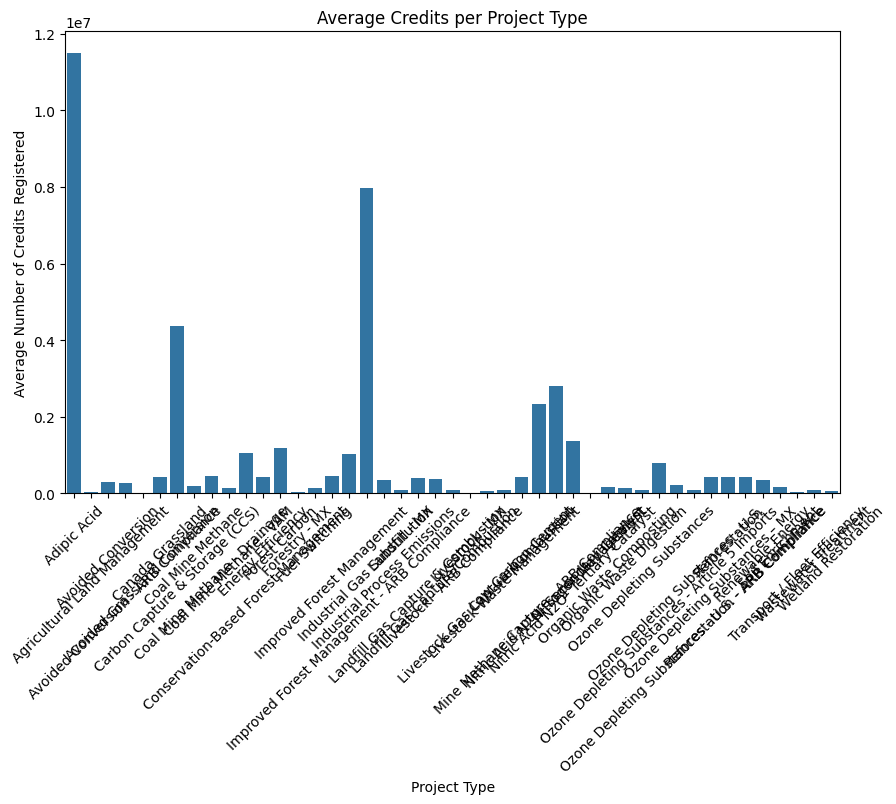

<ipython-input-22-365834bb8e2e>:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='number_of_projects', y='project_site_country', data=projects_per_country, ci=None)


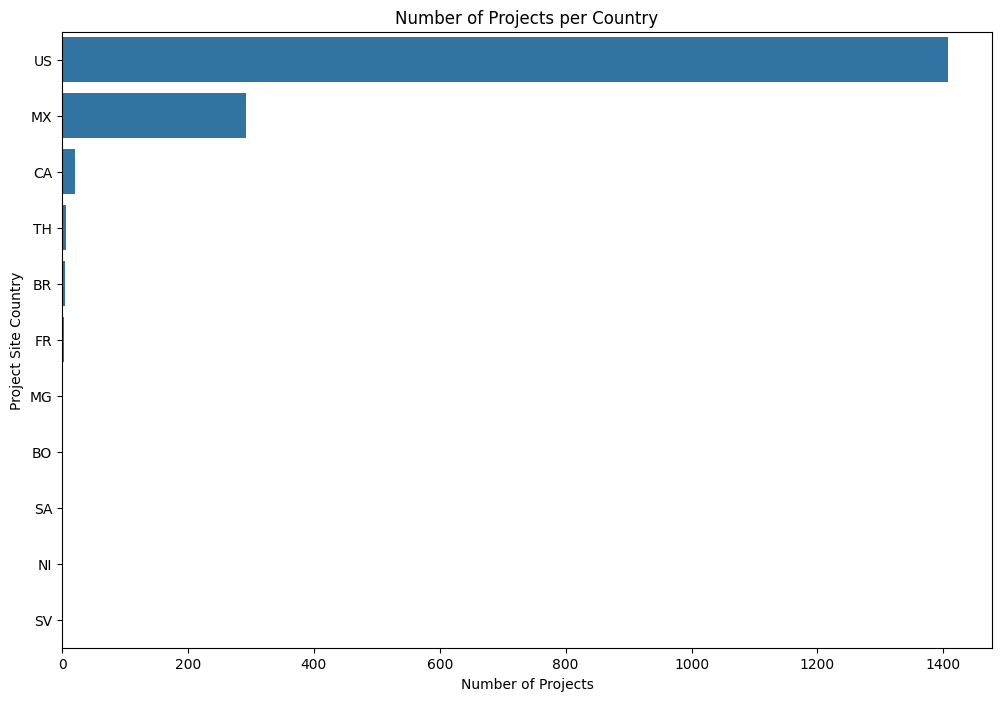

Total credits issued by project type and country:
                                         project_type project_site_country  \
0                                         Adipic Acid                   US   
1                        Agricultural Land Management                   US   
2                                  Avoided Conversion                   US   
3                 Avoided Conversion - ARB Compliance                   US   
4                        Avoided Grassland Conversion                   US   
5                                    Canada Grassland                   CA   
6                      Carbon Capture & Storage (CCS)                   US   
7                                   Coal Mine Methane                   US   
8                        Coal Mine Methane - Drainage                   US   
9                             Coal Mine Methane - VAM                   US   
10               Conservation-Based Forest Management                   US   
11            

In [22]:

df = pd.read_excel('/content/drive/MyDrive/CarbonMarkets_files/raw.xlsx')

date_column = 'project_listed_date'

credits_by_project_type_country = df.groupby(['project_type', 'project_site_country'])['total_number_of_credits_registered'].sum().reset_index()

credits_over_time = df.groupby(df[date_column].dt.to_period('M'))['total_number_of_credits_registered'].sum().reset_index()
credits_over_time[date_column] = credits_over_time[date_column].dt.to_timestamp()

highest_credit_projects = df.loc[df['total_number_of_credits_registered'].idxmax()]
lowest_credit_projects = df.loc[df['total_number_of_credits_registered'].idxmin()]

average_credits_by_project_type = df.groupby('project_type')['total_number_of_credits_registered'].mean().reset_index()

projects_per_country = df['project_site_country'].value_counts().reset_index()
projects_per_country.columns = ['project_site_country', 'number_of_projects']

plt.figure(figsize=(12, 8))
sns.barplot(x='total_number_of_credits_registered', y='project_site_country', hue='project_type', data=credits_by_project_type_country, ci=None)
plt.xlabel('Total Number of Credits Registered')
plt.ylabel('Project Site Country')
plt.title('Total Credits Issued by Project Type and Country')
plt.legend(title='Project Type')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(credits_over_time[date_column], credits_over_time['total_number_of_credits_registered'], marker='o')
plt.xlabel('Time')
plt.ylabel('Total Credits Issued')
plt.title('Trends in Credit Issuance Over Time')
plt.xticks(rotation=45)
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='project_type', y='total_number_of_credits_registered', data=average_credits_by_project_type, ci=None)
plt.xlabel('Project Type')
plt.ylabel('Average Number of Credits Registered')
plt.title('Average Credits per Project Type')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='number_of_projects', y='project_site_country', data=projects_per_country, ci=None)
plt.xlabel('Number of Projects')
plt.ylabel('Project Site Country')
plt.title('Number of Projects per Country')
plt.show()

with pd.ExcelWriter('/content/drive/MyDrive/CarbonMarkets_files/analysis_results.xlsx') as writer:
    credits_by_project_type_country.to_excel(writer, sheet_name='Credits by Type and Country', index=False)
    credits_over_time.to_excel(writer, sheet_name='Credits Over Time', index=False)
    highest_credit_projects.to_frame().T.to_excel(writer, sheet_name='Highest Credit Projects', index=False)
    lowest_credit_projects.to_frame().T.to_excel(writer, sheet_name='Lowest Credit Projects', index=False)
    average_credits_by_project_type.to_excel(writer, sheet_name='Average Credits by Type', index=False)
    projects_per_country.to_excel(writer, sheet_name='Projects per Country', index=False)

print("Total credits issued by project type and country:")
print(credits_by_project_type_country)

print("\nTrends in credit issuance over time:")
print(credits_over_time)

print("\nProject with the highest credit issuance:")
print(highest_credit_projects)

print("\nProject with the lowest credit issuance:")
print(lowest_credit_projects)

print("\nAverage credits per project type:")
print(average_credits_by_project_type)

print("\nNumber of projects per country:")
print(projects_per_country)


#Implementing query feature

In [23]:

file_path = '/content/drive/MyDrive/CarbonMarkets_files/raw.xlsx'
df = pd.read_excel(file_path)

def query_dataset(df, project_type=None, country=None):
    query = {}
    if project_type:
        query['project_type'] = project_type
    if country:
        query['project_site_country'] = country

    if query:
        result = df.loc[(df[list(query)] == pd.Series(query)).all(axis=1)]
    else:
        result = df

    return result

def main():
    print("Welcome to the project query interface!")
    print("SHIFT+Enter1 to quit the interface.")

    while True:
        print("\nEnter your query:")
        project_type = input("Project type (or press Enter to skip): ").strip()
        country = input("Country (or press Enter to skip): ").strip()

        if project_type.lower() == 'exit' or country.lower() == 'exit':
            print("Exiting the interface.")
            break

        project_type = project_type if project_type else None
        country = country if country else None

        result = query_dataset(df, project_type=project_type, country=country)
        if result.empty:
            print("No matching projects found.")
        else:
            print(f"Found {len(result)} matching project(s):")
            print(result)

if __name__ == '__main__':
    main()


Welcome to the project query interface!
Type 'exit' to quit the interface.

Enter your query:
Project type (or press Enter to skip): forestry
Country (or press Enter to skip): us
No matching projects found.

Enter your query:
Project type (or press Enter to skip): Agricultural Land Management
Country (or press Enter to skip): us
No matching projects found.

Enter your query:
Project type (or press Enter to skip): Agricultural Land Management
Country (or press Enter to skip): US
Found 5 matching project(s):
  project_id                                       project_name  \
2     ACR171                    Nitrous Oxide Reduction in Corn   
3     ACR222  Prairie Pothole Avoided Conversion of Grasslan...   
4     ACR230  Emission Reductions in Midsouth Rice Managemen...   
5     ACR205  Emission Reductions in California Rice Managem...   
6     ACR380  CIG Pilot Project 1 - Nitrogen Management Cred...   

                   project_type  \
2  Agricultural Land Management   
3  Agricultural